In [1]:
import sys 
import os 

nb_dir = os.getcwd()
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from plotlib.loaders import *
from plotlib.plotters import *

from phdconf import config
from phdconf.config import *

%matplotlib inline

In [2]:
queries = load_queries(config.AUS_TOPIC_PATH)
broad, specific = load_query_types(queries)
law, fact, generic = load_query_focus_types(queries)

In [3]:
BASE_DIR = os.path.join(os.environ["HOME"], 'phd-generated')

In [4]:
index_names = ['case-topics']
qrel_paths = [config.AUS_QREL_PATH]
rel_levels = [config.AUS_REL_LEVEL]
display_names = ['AUS']

_dir = os.path.join(BASE_DIR, "portions")

In [6]:
base_res = load_1d_dfs(['filtered-phrasestop'], qrel_paths, os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior'), 'case-topics-{0}-unigram_dir_mu_{1:.2f}.run', rel_levels, 1050, 1050, 1)[0][0]
base_qry = load_1d_dfs(['filtered-phrasestop'], qrel_paths, os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior'), 'case-topics-{0}-unigram_dir_mu_{1:.2f}.run', rel_levels, 1050, 1050, 1, per_query=True)[0][0]

In [7]:
interped_dfs = []

inter = Interpolater(os.path.join(BASE_DIR, 'portions', 'case-topics-fact.run'))
for _lambda in np.arange(0, 1.01, 0.01):
    inter.interpolate(os.path.join(BASE_DIR, 'portions', 'case-topics-law.run'), _lambda, 'tmp.run')
    interped_dfs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'])[0])

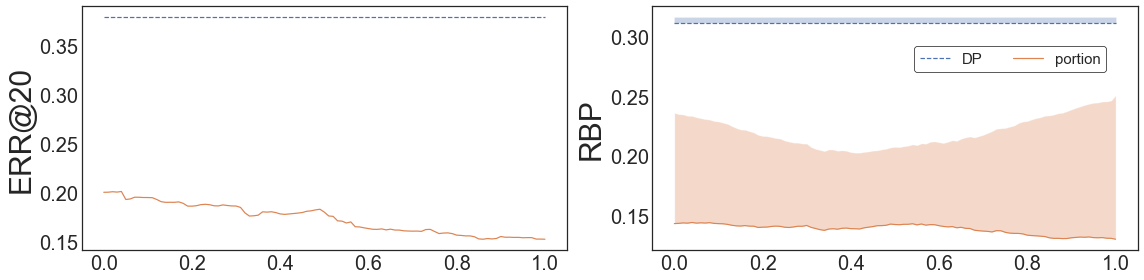

In [12]:
plot = plot_single_orientation(['DP', 'portion'], RERANK_METRICS, [[base_res for x in range(len(interped_dfs))], interped_dfs], 0.0, 1.0, 0.01, styles=['--'], legend=True, legend_x=0.97, legend_y=0.85)

In [13]:
plot.savefig('figures/subdoc-interp.pdf')

In [10]:
len_max = select_1d_max_with_interp(['portion'], [interped_dfs], 0.0, 0.01, '$\lambda$', inter, base_qry, base_res, 1050, os.path.join(BASE_DIR, 'portions', 'case-topics-law.run'), config.AUS_QREL_PATH, config.AUS_REL_LEVEL, metrics=metrics).T

In [11]:
write_table('tables/best-portion', bold_max(len_max).drop(['Unjudged@20'], axis='columns').to_latex(escape=False))

In [12]:
inter.interpolate(os.path.join(BASE_DIR, 'portions', 'case-topics-law.run'), 0.2, 'optimal-portion.run')
inter2 = Interpolater(os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior', 'case-topics-filtered-phrasestop-unigram_dir_mu_1050.00.run'), normalize=True)
interped2_dfs = []
fact_dfs = []
law_dfs = []
for _lambda in np.arange(0, 1.01, 0.01):
    inter2.interpolate('optimal-portion.run', _lambda, 'tmp.run')
    interped2_dfs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'])[0])
    
    inter2.interpolate(os.path.join(BASE_DIR, 'portions', 'case-topics-fact.run'), _lambda, 'tmp.run')
    fact_dfs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'])[0])
    
    inter2.interpolate(os.path.join(BASE_DIR, 'portions', 'case-topics-law.run'), _lambda, 'tmp.run')
    law_dfs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'])[0])

In [13]:
len_max = select_1d_max_with_interp(['interp', 'law'], [interped2_dfs, law_dfs], 0.0, 0.01, '$\lambda$', inter2, base_qry, base_res, 1050, os.path.join(BASE_DIR, 'portions', 'case-topics-law.run'), config.AUS_QREL_PATH, config.AUS_REL_LEVEL, metrics=metrics).T

In [14]:
print(len_max.drop(['Unjudged@20'], axis='columns').to_latex(escape=False))

\begin{tabular}{lllllll}
\toprule
    &   &       RR &   ERR@20 &     R@20 &     NDCG &      RBP \\
\midrule
base & $\lambda$ &  1050.00 &  1050.00 &  1050.00 &  1050.00 &  1050.00 \\
    & - &   0.5686 &   0.3794 &   0.4600 &   0.4613 &   0.3113 \\
interp & $\lambda$ &     0.00 &     0.00 &     0.07 &     0.00 &     0.00 \\
    & - &   0.5686 &   0.3794 &   0.4660 &   0.4613 &   0.3113 \\
law & $\lambda$ &     0.04 &     0.01 &     0.01 &     0.03 &     0.03 \\
    & - &   0.5825 &   0.3824 &   0.4615 &   0.4660 &   0.3152 \\
\bottomrule
\end{tabular}



In [15]:
to = 20
plot2 = plot_tune_1d_comp(['base', 'interp', 'fact', 'law'], metrics, [[base_res for x in range(len(interped2_dfs[:to+1]))], interped2_dfs[:to+1], fact_dfs[:to+1], law_dfs[:to+1]], 0.0, to/100, 0.01, styles=['--'], ylims=ylims, legend_x=0.91)

<Figure size 1152x432 with 6 Axes>

In [16]:
plot2.savefig('figures/ausnl-portion-base-interp.pdf')

In [17]:
tt_folds = read_folds('ausnl-folds.txt')

In [18]:
# inter.interpolate(os.path.join(BASE_DIR, 'portions', 'case-topics-law.run'), 0.17, 'optimal-portion.run')
inter2 = Interpolater(os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior', 'case-topics-filtered-phrasestop-unigram_dir_mu_1050.00.run'), normalize=True)
interped2_dfs = []
fact_dfs = []
law_dfs = []
for _lambda in np.arange(0, 1.01, 0.01):
    inter2.interpolate('optimal-portion.run', _lambda, 'tmp.run')
    interped2_dfs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'], per_query=True)[0])
    
    inter2.interpolate(os.path.join(BASE_DIR, 'portions', 'case-topics-law.run'), _lambda, 'tmp.run')
    law_dfs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'], per_query=True)[0])
    
    inter2.interpolate(os.path.join(BASE_DIR, 'portions', 'case-topics-fact.run'), _lambda, 'tmp.run')
    fact_dfs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'], per_query=True)[0])

In [19]:
cv_df = pd.DataFrame(columns=config.METRIC_NAMES)

for ab, runs in zip(['portion', 'fact', 'law'],[interped2_dfs, fact_dfs, law_dfs]):
    cross = cross_validation(runs, tt_folds, config.METRIC_NAMES, base_qry)
    cv_df.loc[ab] = cross[0]
    
cv_df.loc['$R$'] = ['{:.4f}'.format(base_res[m]) for m in config.METRIC_NAMES]
cv_df = cv_df.reindex(['$R$', 'portion', 'fact', 'law'])
write_table('tables/ausnl-portion', bold_max(cv_df).drop(['unjudged@20', 'recall_100'],axis='columns').rename(config.METRIC_NAMES, axis='columns').to_latex(escape=False))

## Compare portion to para effectiveness

In [20]:
# max for err@20

om = copy.copy(config.METRIC_NAMES)
del om['recall_100']
del om['unjudged@20']
# read both runs into array and join and subtract portion 
interps = list(map(float, len_max.loc['law', '$\lambda$'].values))
para_interps = [0.04, 0.0, 0.02, 0.04, 0.02]

cols = om.keys()

a = pd.DataFrame()
b = pd.DataFrame()

comp = load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'], per_query=True)[0]
run_names = ['case-topics-top-2-paras-rerank-dir-mu-300.00.run']#, 'case-topics-para-rerank-window-50-context-dir-mu-300.00.run']
for r in run_names:
    for j, c in zip(interps, cols):
        inter2.interpolate(os.path.join(BASE_DIR, 'portions', 'case-topics-law.run'), j, 'tmp.run')
        a[c] = load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'], per_query=True)[0][c]
    
    for j, c in zip(para_interps, cols):
        inter2.interpolate(os.path.join(BASE_DIR, 'dirichlet_prior', 'case-topics-top-2-paras-rerank-dir-mu-300.00.run'), j, 'tmp.run')
        b[c] = load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'], per_query=True)[0][c]
    
    qry_comp_df = a-b
    qry_comp_fig = qry_comp_df[om.keys()].rename(metrics, axis='columns').plot.box(fontsize=15, boxprops=dict(linestyle='-', linewidth=2), medianprops=dict(linestyle='-', linewidth=2), color=dict(boxes='black', whiskers='black', medians='b', caps='r'),figsize=(16, 4)).axhline(y=0, xmin=0.0, xmax=1.0, linestyle='--', linewidth=1.0, color='grey')
    qry_comp_fig.get_figure().savefig('figures/ausnl-para-portion-qry-comp.pdf')


/home/danlocke/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 1152x288 with 1 Axes>

In [21]:
#from scipy.stats import linregress


In [19]:
# def get_regress(dfs, df_names):
#     out = {}
#     y = np.arange(0.0, 1.05, 0.05)
#     for (i, df) in enumerate(dfs):
#         for metric in config.METRIC_NAMES:
#             res = linregress([x[metric] for x in df], y)
#             # print(res, res[0], res[2])
# #             print(metric, df_names[i])
#             out[(df_names[i], metric)] = {'slope': res[0], 'r': res[2]}

#     df = pd.DataFrame.from_dict(out).stack().unstack(level=0)
#     print(df)
# get_regress(fact_dfs+law_dfs+generic_dfs, ['fact', 'law', 'generic'])

In [20]:
# import subprocess 
# def get_unjudged(qrel_path: str, path: str):
    
#     args = ['trec_eval', '-q', qrel_path, path, '-m', 'relstring.10']
# #     args[0] = os.path.join(TREC_FILE_PATH, args[0])
#     res = subprocess.check_output(args)
#     ret = []
#     for line in res.decode('utf-8').split('\n'):
#         if line == '':
#             break
#         parts = line.split()
#         # add 1 for the quotation mark
#         print(parts[2])
#         unjudged = parts[2].count('-')
#         nonrel = parts[2].count('0')
            
# #         # add 1 for the quotation mark
# #         unjudged_at_10 = parts[2][:11].count('-')
# #         nonrel_at_10 = parts[2][:11].count('0')
    
# #         ret.append((parts[1], unjudged, nonrel, unjudged_at_10, nonrel_at_10))
        
# get_unjudged(config.AUS_QREL_PATH, os.path.join(_dir, 'case-topics-fl-interp-0.90.run'))

In [21]:
# dfs_query= load_1d_dfs(index_names, qrel_paths, _dir, '{0}-fl-interp-{1:.2f}.run', rel_levels, 0, 1.05, 0.05, per_query=True)
# baseline = load_1d_dfs(index_names, qrel_paths, os.path.join(BASE_DIR, 'dirichlet_prior'), '{0}-filtered-stop-unigram_dir_mu_{1:.2f}.run', rel_levels, 2900, 2901, 1, per_query=True)

In [22]:
# plot_diff_query_ind(dfs_query[0], baseline[0], -1, config.METRIC_NAMES, queries, True)

In [29]:
# import subprocess

# runs = [os.path.join(BASE_DIR, 'dirichlet_prior', 'case-topics-filtered-stop-unigram_dir_mu_2900.00.run'), os.path.join(_dir, 'case-topics-fl-interp-1.00.run'), os.path.join(_dir, 'case-topics-fl-interp-0.00.run')]
# comb_method = ['combmax', 'combanz', 'combmed', 'combmin', 'combmax', 'combmnz', 'combsum']
# for method in comb_method:
#     f = open("{0}-tmp.run".format(method), "w")
#     subprocess.call(['polyfuse', method, '-n', 'std'] + runs, stdout=f)
#     f.close()

In [30]:
# comb_method_dfs = load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '.', ['{0}-tmp.run'.format(x) for x in comb_method])
# print(pd.DataFrame.from_dict({k: comb_method_dfs[i] for i, k in enumerate(comb_method)}))

In [31]:
# queries